In [1]:
import os
import json
import zipfile


In [2]:
! pip install kaggle

In [8]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [ ]:
unzip dataset-name.zip

SyntaxError: invalid syntax (1125974450.py, line 1)

In [1]:
! pip install opendatasets


In [ ]:
import cgi
import html

ModuleNotFoundError: No module named 'cgi'

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

ModuleNotFoundError: No module named 'cgi'

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Data preprocessing**

**Training Image Preprocessing**

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


**Validation Image Preprocessing**


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[173.25 165.25 162.25]
   [176.5  168.5  165.5 ]
   [171.   163.   160.  ]
   ...
   [215.   212.   207.  ]
   [222.   219.   214.  ]
   [201.75 198.75 193.75]]

  [[179.5  171.5  168.5 ]
   [178.   170.   167.  ]
   [180.   172.   169.  ]
   ...
   [208.75 205.75 200.75]
   [202.25 199.25 194.25]
   [210.75 207.75 202.75]]

  [[182.25 174.25 171.25]
   [182.5  174.5  171.5 ]
   [177.25 169.25 166.25]
   ...
   [199.75 196.75 191.75]
   [197.25 194.25 189.25]
   [198.75 195.75 190.75]]

  ...

  [[121.5  112.5  113.5 ]
   [136.25 128.25 126.25]
   [131.25 123.25 121.25]
   ...
   [157.25 149.25 146.25]
   [158.   150.   147.  ]
   [139.5  131.5  128.5 ]]

  [[142.75 133.75 134.75]
   [144.75 136.75 134.75]
   [149.5  141.5  139.5 ]
   ...
   [144.5  136.5  133.5 ]
   [157.75 149.75 146.75]
   [124.25 116.25 113.25]]

  [[141.75 132.75 133.75]
   [162.   153.   154.  ]
   [148.75 139.75 140.75]
   ...
   [134.75 126.75 123.75]
   [137.5  129.5  126.5 ]
   [152.25 144.25 14

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,Input
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
#building convulation model

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
# model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))



In [19]:
model.add(Dropout(0.4))  #to avoid overfitting(model unable to fetch data)

In [20]:
#output layer
model.add(Dense(units=38,activation='softmax'))

Model compilar

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [24]:
training_history = model.fit(x=training_set,epochs=10,validation_data=validation_set)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 161s 67ms/step - accuracy: 0.4199 - loss: 2.0531 - val_accuracy: 0.8416 - val_loss: 0.4970
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 188s 65ms/step - accuracy: 0.8456 - loss: 0.5023 - val_accuracy: 0.8655 - val_loss: 0.4240
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 0.9128 - loss: 0.2743 - val_accuracy: 0.9270 - val_loss: 0.2349
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 191s 60ms/step - accuracy: 0.9412 - loss: 0.1815 - val_accuracy: 0.9523 - val_loss: 0.1521
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9578 - loss: 0.1329 - val_accuracy: 0.9528 - val_loss: 0.1532
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 60ms/step - accuracy: 0.9665 - loss: 0.1048 - val_accuracy: 0.9458 - val_loss: 0.1746
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 59ms/step - accuracy: 0.9733 - loss: 0.0814 - val_accuracy: 0.9548 - val_loss: 0.1557
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 

**Model Evaluation**

In [25]:
# Modal eval on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.9918 - loss: 0.0269


In [26]:
print(train_loss , train_acc)

0.022909732535481453 0.9930578470230103


In [27]:
# Model eval on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9662 - loss: 0.1204


In [28]:
print(val_loss , val_acc)

0.11533448845148087 0.96687912940979


***Model Saving***

In [29]:
model.save("trained_model.keras")

In [30]:
training_history.history

{'accuracy': [0.6205278038978577,
  0.8676150441169739,
  0.9206344485282898,
  0.9455010890960693,
  0.9605093002319336,
  0.9672664999961853,
  0.9744220972061157,
  0.9778647422790527,
  0.9813358187675476,
  0.9841809272766113],
 'loss': [1.287319540977478,
  0.4241146743297577,
  0.2478649616241455,
  0.16743004322052002,
  0.12372351437807083,
  0.10015576332807541,
  0.07765252888202667,
  0.06927207112312317,
  0.057798031717538834,
  0.0502457395195961],
 'val_accuracy': [0.8415661454200745,
  0.8655247092247009,
  0.9270430207252502,
  0.9523105025291443,
  0.9528226852416992,
  0.9458228945732117,
  0.954757571220398,
  0.9591964483261108,
  0.9618711471557617,
  0.96687912940979],
 'val_loss': [0.49704957008361816,
  0.42395347356796265,
  0.23490434885025024,
  0.152057483792305,
  0.1531575322151184,
  0.17462970316410065,
  0.1556742787361145,
  0.13655127584934235,
  0.14523400366306305,
  0.11533453315496445]}

In [31]:
# Recording model history in json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

**Accuracy Visualization**

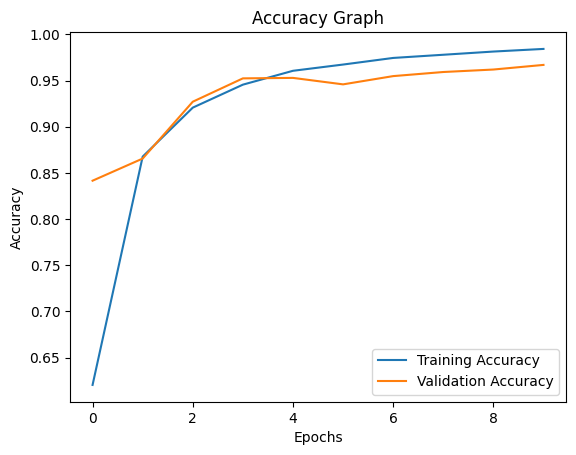

In [32]:
epochs = [i for i in range(10)]
plt.plot(epochs,training_history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()

**Other Metrics for model evaluation**

In [33]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step


In [36]:
y_pred,y_pred.shape

(array([[1.0000000e+00, 1.4088108e-09, 5.0754323e-13, ..., 7.4765190e-17,
         6.3259593e-15, 1.0027203e-14],
        [1.0000000e+00, 2.3274204e-12, 3.1532817e-14, ..., 1.0081054e-21,
         2.2820980e-17, 9.2807049e-19],
        [1.0000000e+00, 2.6460978e-10, 6.5090773e-11, ..., 1.2073581e-15,
         1.0179447e-12, 1.6892198e-12],
        ...,
        [3.4938843e-09, 3.5719976e-11, 4.8315282e-08, ..., 4.6296336e-09,
         1.7876594e-09, 9.9999058e-01],
        [2.4618118e-12, 7.2951713e-16, 4.2917302e-11, ..., 1.2108515e-12,
         2.6904103e-13, 1.0000000e+00],
        [2.9524475e-14, 3.2766215e-16, 1.2465669e-13, ..., 1.2704611e-15,
         3.5579077e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [38]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

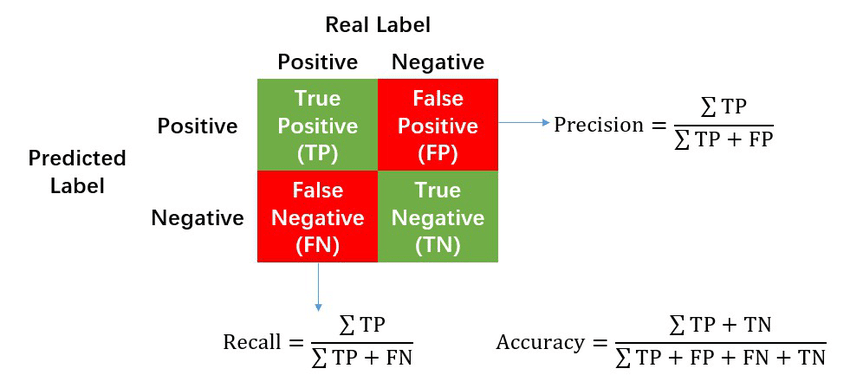


In [40]:
 from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.98      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.98      0.95      0.96       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

In [42]:
confmatrix =  confusion_matrix(y_true,predicted_categories)
confmatrix.shape

(38, 38)

**Confusion matrix visualization**

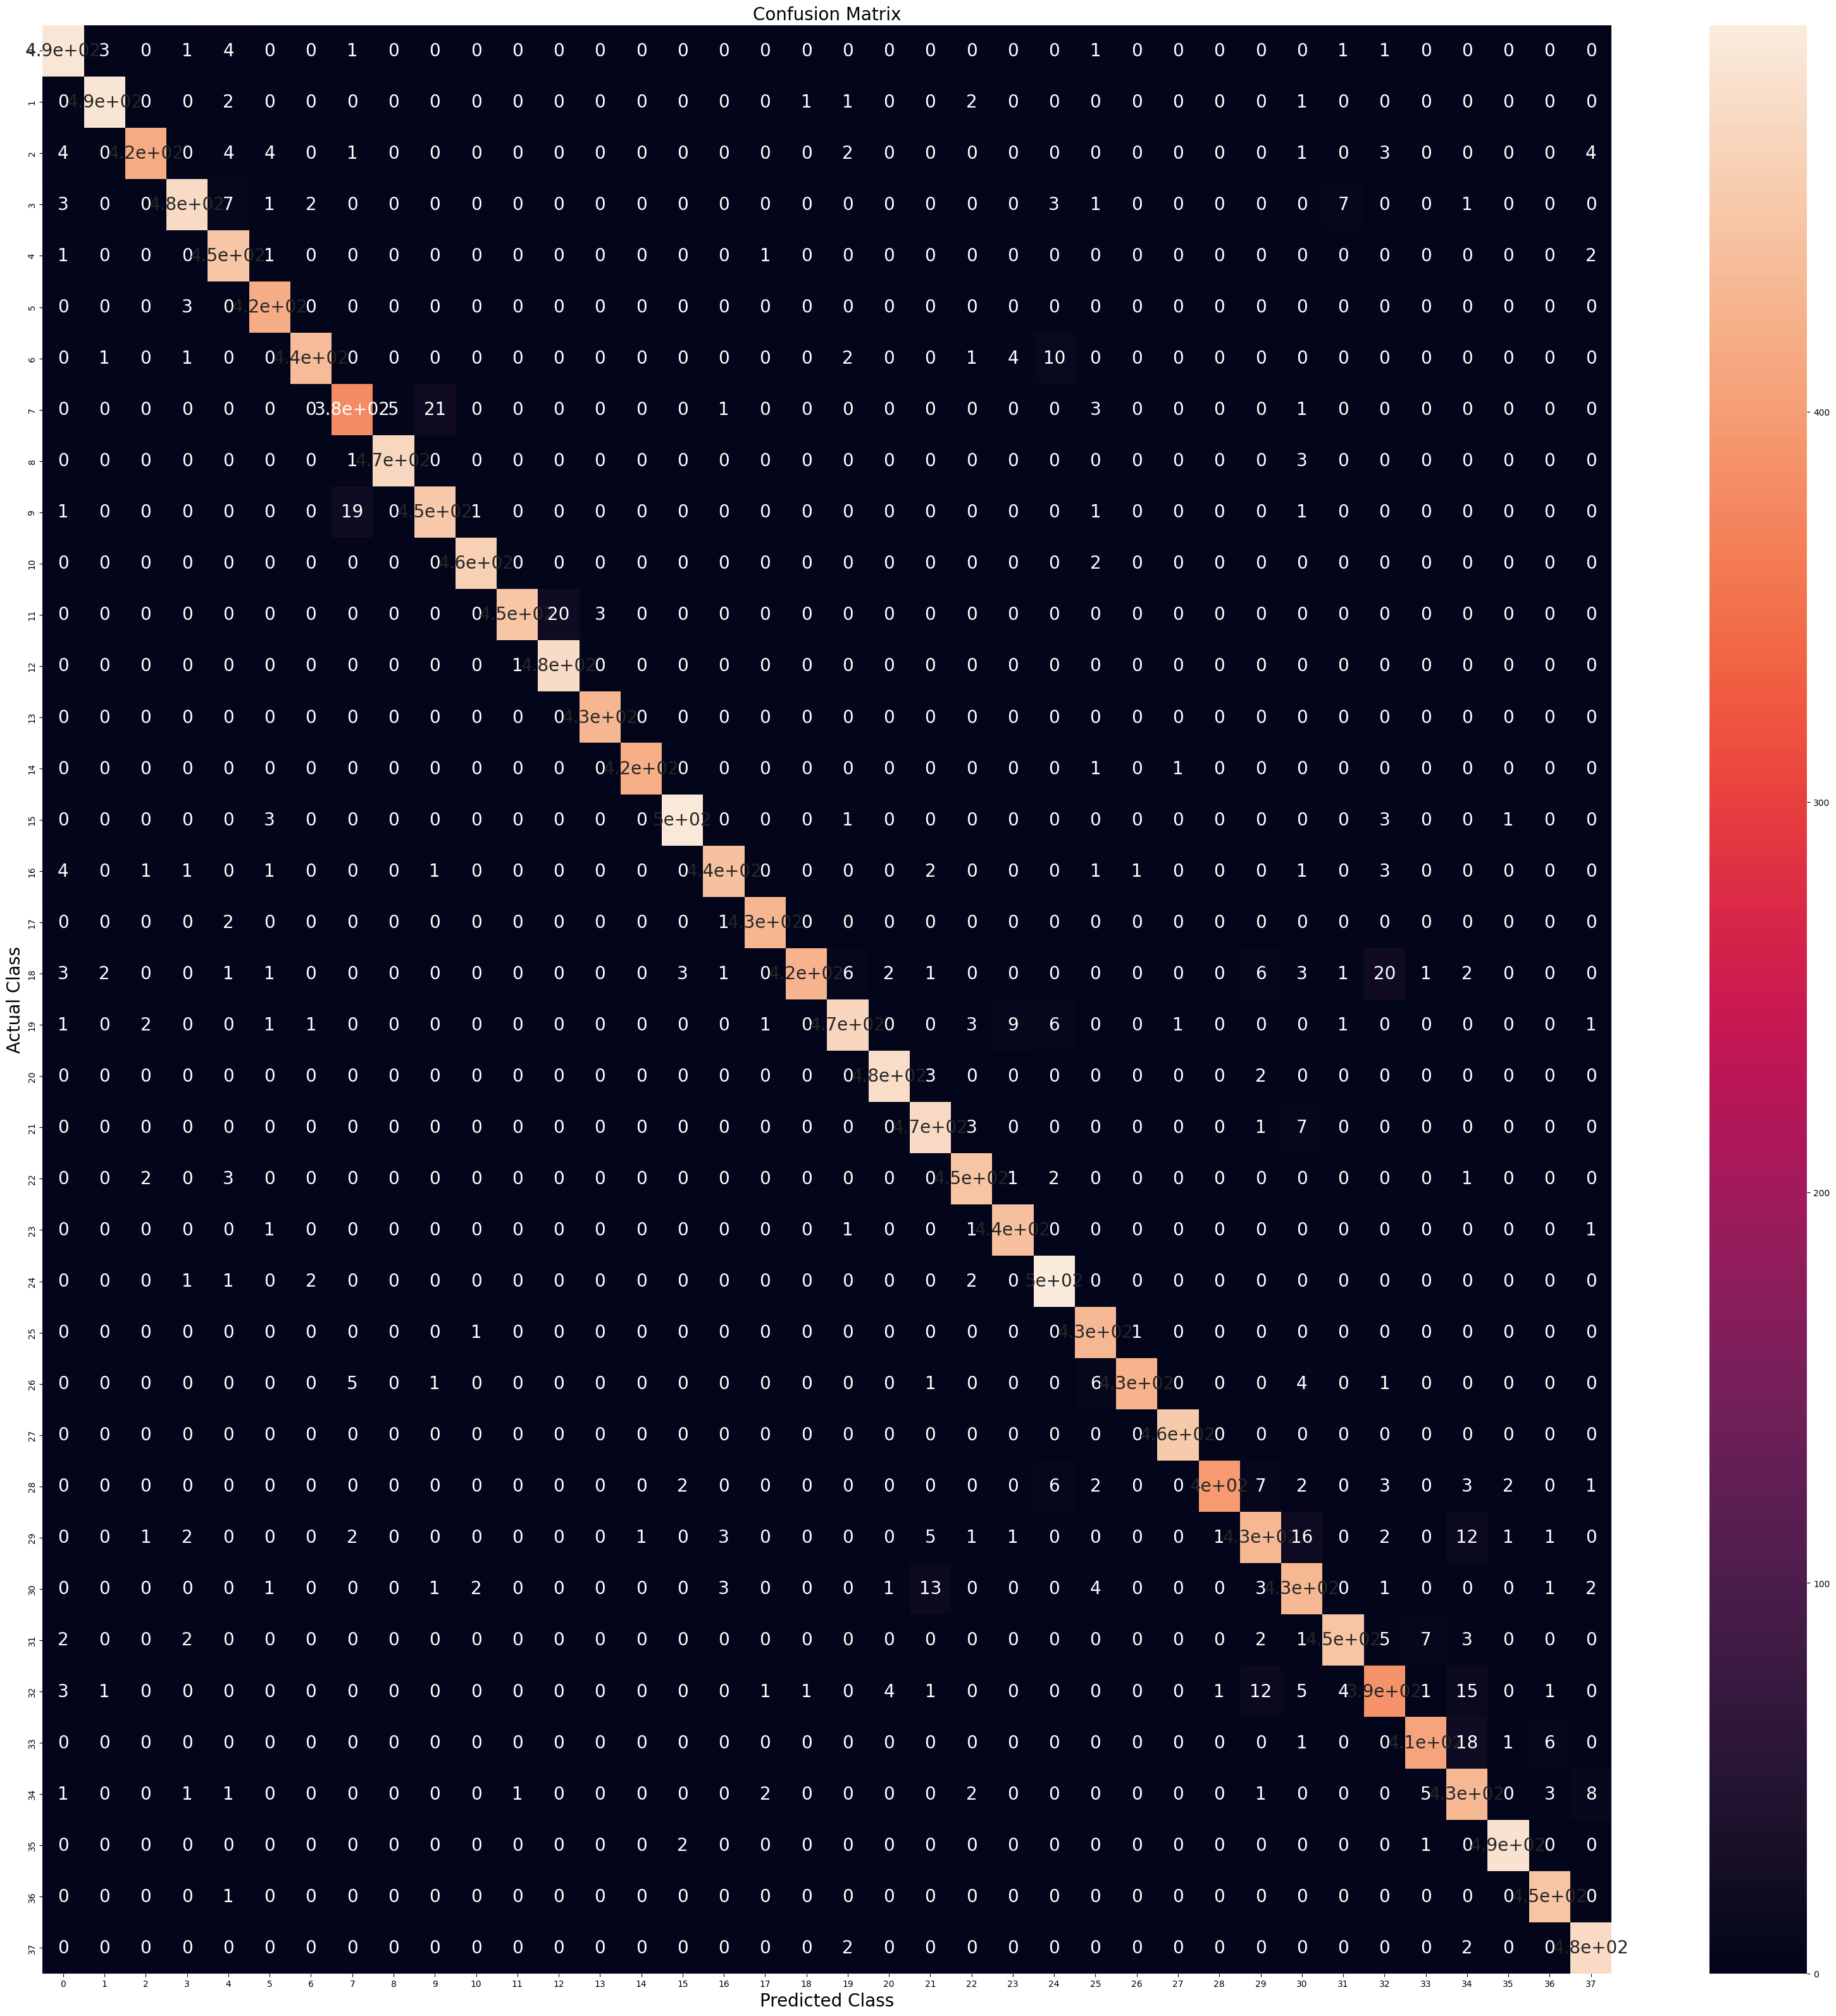

In [43]:

plt.figure(figsize=(40,40))
sns.heatmap(confmatrix,annot=True,annot_kws={'size':20})
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

# Testing

**Visualizing Single image of test set**

In [44]:
!pip install opencv-python

In [63]:
import cv2
image_path = "/content/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus6.JPG"

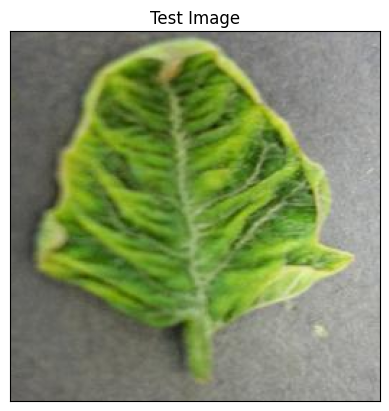

In [64]:
# Reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  #Convert BGR image to RGB

# Displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# **Testing Model**

In [65]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [66]:
prediction = model.predict(input_arr)
print(prediction.shape)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
(1, 38)


(array([[8.2830547e-23, 1.6581369e-24, 4.4786110e-16, 1.2217874e-20,
         2.3236729e-19, 1.6380194e-16, 2.1856766e-22, 1.8595285e-23,
         2.0651507e-25, 1.7254883e-21, 1.8762527e-22, 8.6864180e-18,
         3.4335485e-20, 6.1708819e-18, 1.6111330e-20, 6.4541211e-16,
         1.6495672e-19, 1.2641664e-23, 8.2898997e-19, 1.5758869e-16,
         1.4635177e-25, 1.1005891e-20, 3.2402097e-19, 1.4890751e-15,
         1.4124804e-17, 1.1575184e-15, 1.1406012e-19, 3.1194199e-20,
         2.8685328e-11, 1.2072207e-14, 5.7819263e-17, 5.5050130e-20,
         2.8908017e-17, 7.3651560e-17, 2.2662344e-14, 1.0000000e+00,
         1.4334156e-18, 5.5370105e-18]], dtype=float32),
 (1, 38))

In [67]:
result_index = np.argmax(prediction)
print(result_index)

35


In [61]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

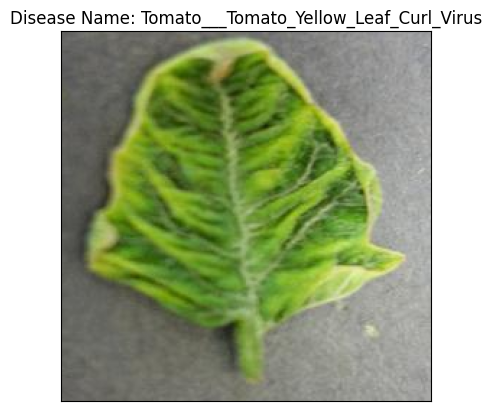

In [68]:
# Display result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title("Disease Name: "+model_prediction)
plt.xticks([])
plt.yticks([])
plt.show()

In [52]:
model_prediction = class_name[result_index]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')